 ### ****Problem Statement****

To identify key revenue and profit drivers accross products, channels, and regions, uncover seasonal trends and outliers, and align performance against budgets. use  thses insight to optimize pricing, promotion and market expansion for sustainable growth and reduce concenteration risk


In [97]:
### ***Importing Libraries***
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [98]:
sheets = pd.read_excel('/content/Regional Sales Dataset (1).xlsx',sheet_name=None)

In [99]:
# Assign Dataframe to each sheet

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']


In [100]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2020-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2020-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2020-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2020-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2020-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [101]:
df_sales.shape

(64104, 12)

In [102]:
print('df_sales shape: ',(df_sales.shape))
print('df_customers shape:',(df_customers.shape))
print('df_products Shape:',(df_products.shape))
print('df_regions shape:',(df_regions.shape))
print('df_state_reg:',(df_state_reg.shape))
print('df_budgets:',(df_budgets.shape))




df_sales shape:  (64104, 12)
df_customers shape: (175, 2)
df_products Shape: (30, 2)
df_regions shape: (994, 15)
df_state_reg: (49, 3)
df_budgets: (30, 2)


In [103]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2020-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2020-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2020-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2020-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2020-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [104]:
df_customers.head()

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [105]:
df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [106]:
df_regions.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [107]:
df_state_reg.head()

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [108]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [109]:
df_budgets.head()

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [110]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [111]:
df_state_reg.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [112]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [113]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [114]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


# Data Cleaning and Wrangling


In [115]:
# Merge with Customers

df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
    )

In [116]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2020-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2020-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2020-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2020-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2020-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [117]:
# Merge with Product

df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
    )

In [118]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2020-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2020-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2020-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2020-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2020-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [119]:
# Merge with Region

df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
    )

In [120]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2020-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2020-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2020-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2020-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2020-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [121]:
# Merge with State Region

df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
    )

In [122]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2020-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2020-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2020-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2020-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2020-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [123]:
# Merge with Budget

df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
    )

In [124]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2020-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2020-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2020-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2020-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2020-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [125]:
#Customer Index
#Index
#id
#State Code

# Clean up redundant columns
cols_to_drop = ['Customer Index','Index','id','State Code']
df=df.drop(columns = cols_to_drop,errors='ignore')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2020-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2020-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2020-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2020-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2020-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [126]:
# Convert all column to lower case for consistency and easy access
df.columns = df.columns.str.lower()

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [127]:
# Keep Important Columns

cols_to_keep = [
    'ordernumber',
    'orderdate',
    'channel',
    'delivery region index',
    'product description index',
    'order quantity',
    'unit price',
    'total unit cost',
    'product name',
    'longitude',
    'state_code',
    'state',
    'line total',
    'county',
    'region',
    'latitude',
    'population',
    '2017 budgets']

In [128]:
df = df[cols_to_keep]

In [129]:
df.head(5)

,ordernumber,orderdate,channel,delivery region index,product description index,order quantity,unit price,total unit cost,product name,longitude,state_code,state,line total,county,region,latitude,population,2017 budgets
0,SO - 000225,2020-01-01 00:00:00,Wholesale,364,27,6,2499.1,1824.343,Product 27,-81.09983,GA,Georgia,14994.6,Chatham County,South,32.08354,145674,964940.231
1,SO - 0003378,2020-01-01 00:00:00,Distributor,488,20,11,2351.7,1269.918,Product 20,-86.10665,IN,Indiana,25868.7,Johnson County,Midwest,39.61366,55586,2067108.120
2,SO - 0005126,2020-01-01 00:00:00,Wholesale,155,26,6,978.2,684.740,Product 26,-121.87468,CA,California,5869.2,Alameda County,West,37.66243,79510,5685138.270
3,SO - 0005614,2020-01-01 00:00:00,Export,473,7,7,2338.3,1028.852,Product 7,-86.52639,IN,Indiana,16368.1,Monroe County,Midwest,39.16533,84067,889737.555
4,SO - 0005781,2020-01-01 00:00:00,Wholesale,256,8,8,2291.4,1260.270,Product 8,-72.52443,CT,Connecticut,18331.2,Hartford County,Northeast,41.77524,58007,1085037.329


In [130]:
df.tail(1)

,ordernumber,orderdate,channel,delivery region index,product description index,order quantity,unit price,total unit cost,product name,longitude,state_code,state,line total,county,region,latitude,population,2017 budgets
64103,SO - 0008654,2024-02-28 00:00:00,Distributor,807,15,8,998.3,848.555,Product 15,-122.80371,OR,Oregon,7986.4,Washington County,West,45.48706,96577,3299478.315


In [131]:
# Rename Colmmn
df = df.rename(columns={
    'ordernumber':'order_number',
    'orderdate':'order_date',
    'delivery region index':'delivery_region_index',
    'product description index':'product_description_index',
    'order quantity':'order_quantity',
    'unit price':'unit_price',
    'state_code':'state',
    'state':'state_name',
    'total unit cost':'total_unit_cost',
    'product name':'product_name',
    'line total':'revenue',
    '2017 budgets':'budget',
    })

In [132]:
df.head(1)

,order_number,order_date,channel,delivery_region_index,product_description_index,order_quantity,unit_price,total_unit_cost,product_name,longitude,state,state_name,revenue,county,region,latitude,population,budget
0,SO - 000225,2020-01-01 00:00:00,Wholesale,364,27,6,2499.1,1824.343,Product 27,-81.09983,GA,Georgia,14994.6,Chatham County,South,32.08354,145674,964940.231


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   order_number               64104 non-null  object 
 1   order_date                 64104 non-null  object 
 2   channel                    64104 non-null  object 
 3   delivery_region_index      64104 non-null  int64  
 4   product_description_index  64104 non-null  int64  
 5   order_quantity             64104 non-null  int64  
 6   unit_price                 64104 non-null  float64
 7   total_unit_cost            64104 non-null  float64
 8   product_name               64104 non-null  object 
 9   longitude                  64104 non-null  float64
 10  state                      64104 non-null  object 
 11  state_name                 64104 non-null  object 
 12  revenue                    64104 non-null  float64
 13  county                     64104 non-null  obj

In [137]:
df.to_csv('final.csv')

In [138]:
df.head(1)

,order_number,order_date,channel,delivery_region_index,product_description_index,order_quantity,unit_price,total_unit_cost,product_name,longitude,state,state_name,revenue,county,region,latitude,population,budget
0,SO - 000225,2020-01-01 00:00:00,Wholesale,364,27,6,2499.1,1824.343,Product 27,-81.09983,GA,Georgia,14994.6,Chatham County,South,32.08354,145674,964940.231


In [139]:
df['total_cost'] = df['order_quantity'] * df['total_unit_cost']

In [140]:
df['profit'] = df['revenue'] - df['total_cost']

In [141]:
df['profit_margin_pct'] = df['profit']/df['revenue']*100

In [142]:
df.head(5)

,order_number,order_date,channel,delivery_region_index,product_description_index,order_quantity,unit_price,total_unit_cost,product_name,longitude,...,state_name,revenue,county,region,latitude,population,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2020-01-01 00:00:00,Wholesale,364,27,6,2499.1,1824.343,Product 27,-81.09983,...,Georgia,14994.6,Chatham County,South,32.08354,145674,964940.231,10946.058,4048.542,27.0
1,SO - 0003378,2020-01-01 00:00:00,Distributor,488,20,11,2351.7,1269.918,Product 20,-86.10665,...,Indiana,25868.7,Johnson County,Midwest,39.61366,55586,2067108.120,13969.098,11899.602,46.0
2,SO - 0005126,2020-01-01 00:00:00,Wholesale,155,26,6,978.2,684.740,Product 26,-121.87468,...,California,5869.2,Alameda County,West,37.66243,79510,5685138.270,4108.440,1760.760,30.0
3,SO - 0005614,2020-01-01 00:00:00,Export,473,7,7,2338.3,1028.852,Product 7,-86.52639,...,Indiana,16368.1,Monroe County,Midwest,39.16533,84067,889737.555,7201.964,9166.136,56.0
4,SO - 0005781,2020-01-01 00:00:00,Wholesale,256,8,8,2291.4,1260.270,Product 8,-72.52443,...,Connecticut,18331.2,Hartford County,Northeast,41.77524,58007,1085037.329,10082.160,8249.040,45.0


# EDA

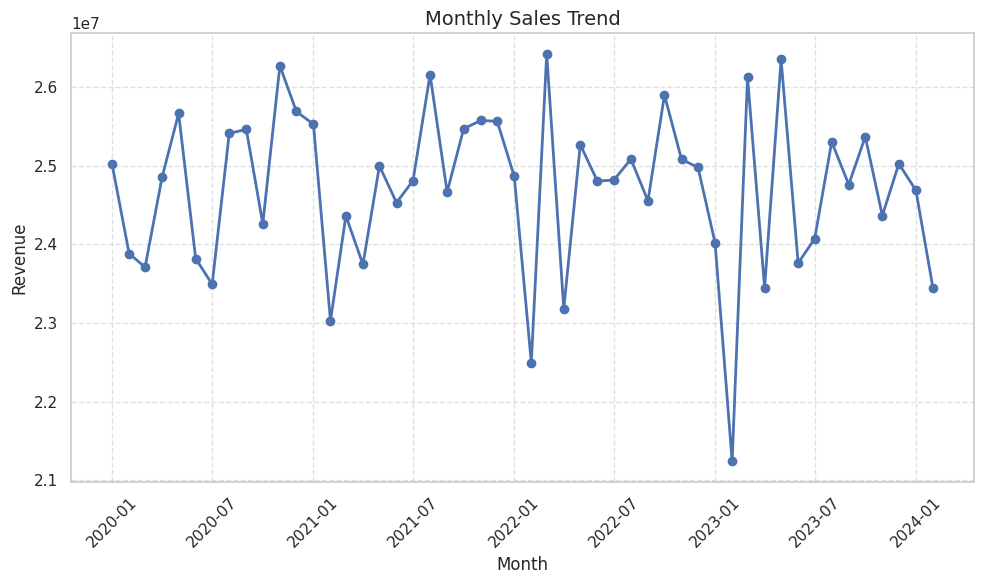

In [143]:
# Ensure order_date is a datetime column, coercing errors
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Drop rows where order_date is NaT after coercion
df.dropna(subset=['order_date'], inplace=True)

# Extract year-month for grouping
df['year_month'] = df['order_date'].dt.to_period('M')

# Aggregate revenue (or total_cost/profit, depending on your need)
monthly_sales = df.groupby('year_month')['revenue'].sum().reset_index()

# Convert back to datetime for plotting
monthly_sales['year_month'] = monthly_sales['year_month'].dt.to_timestamp()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['revenue'], marker='o', linewidth=2)

# Add titles and labels
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Optional: format x-axis ticks for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [156]:
# Ensure order_date is a datetime column
df['order_date'] = pd.to_datetime(df['order_date'])

# Define the date range to remove
start_remove = '2024-01-01'
end_remove = '2024-02-29'

# Filter out those records
df_new = df[~df['order_date'].between(start_remove, end_remove)]


/tmp/ipython-input-2148153130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'])
/tmp/ipython-input-2148153130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new['order_date'].dt.month
/tmp/ipython-input-2148153130.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

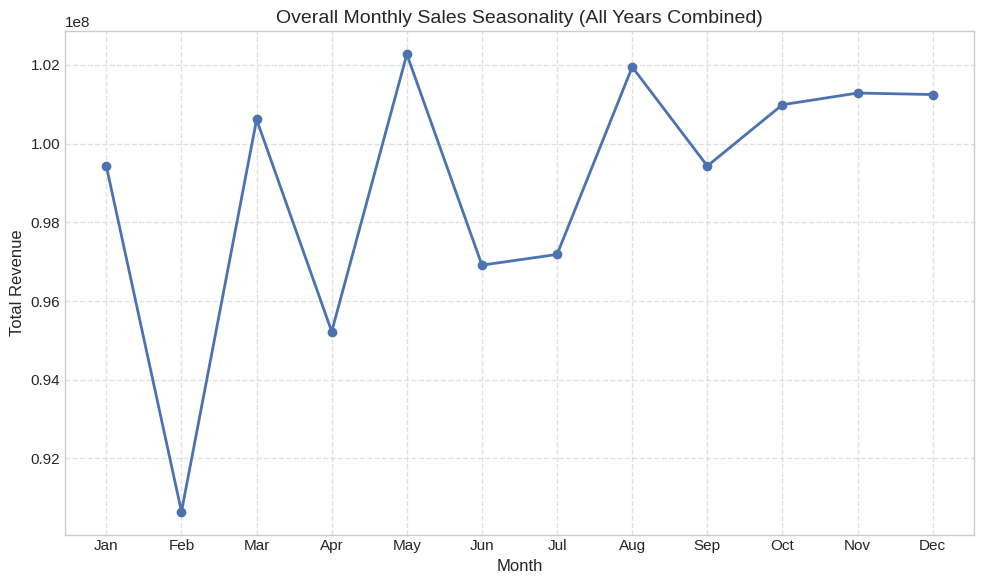

In [158]:
# Ensure order_date is in datetime format
df_new['order_date'] = pd.to_datetime(df_new['order_date'])

# Extract month as a number and name
df_new['month'] = df_new['order_date'].dt.month
df_new['month_name'] = df_new['order_date'].dt.strftime('%b')

# Aggregate revenue across all years for each calendar month
monthly_seasonality = (
    df_new.groupby(['month', 'month_name'])['revenue']
    .sum()
    .reset_index()
    .sort_values('month')
)

# Plot the seasonality trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_seasonality['month_name'], monthly_seasonality['revenue'], marker='o', linewidth=2)

# Add titles and labels
plt.title('Overall Monthly Sales Seasonality (All Years Combined)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipython-input-21959079.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'], errors='coerce')
/tmp/ipython-input-21959079.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['year'] = df_new['order_date'].dt.year


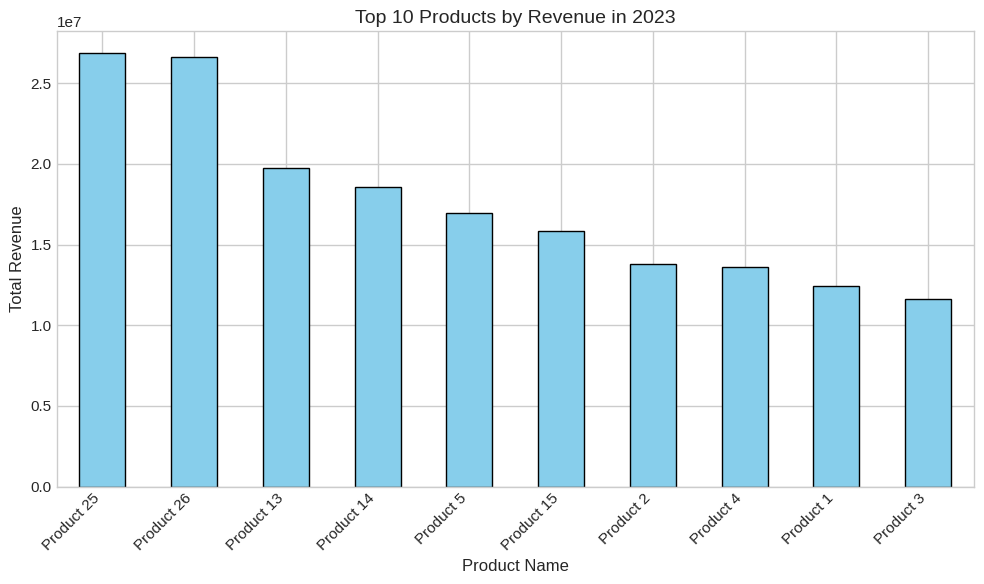

In [159]:
# Assuming df is your DataFrame
# Example: df = pd.read_csv('your_file.csv')

# --- Step 1: Convert order_date to datetime (if not already) ---
df_new['order_date'] = pd.to_datetime(df_new['order_date'], errors='coerce')

# --- Step 2: Extract the year ---
df_new['year'] = df_new['order_date'].dt.year

# --- Step 3: Choose the year of interest (e.g., most recent year) ---
latest_year = df_new['year'].max()

# --- Step 4: Filter data for that year ---
df_year = df_new[df_new['year'] == latest_year]

# --- Step 5: Group by product_name and sum the revenue ---
top_products = (
    df_year.groupby('product_name')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# --- Step 6: Plot the chart ---
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title(f"Top 10 Products by Revenue in {latest_year}",fontsize=14)
plt.xlabel("Product Name",fontsize=12)
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2698762917.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'order_date': pd.to_datetime(pd.date_range(start='2024-01-01', periods=num_rows, freq='H').to_numpy().reshape(-1)),


Sample DataFrame created successfully.
Total Unique Products: 30

--- Bottom Ten Products by Revenue ---
   product_name     revenue
16   Product 24  14555053.2
29    Product 9  14598630.0
21   Product 29  15311014.2
14   Product 22  15617458.8
27    Product 7  17058267.0
1    Product 10  17614460.8
19   Product 27  18377791.8
23   Product 30  18567328.1
15   Product 23  18856855.2
13   Product 21  19245629.4


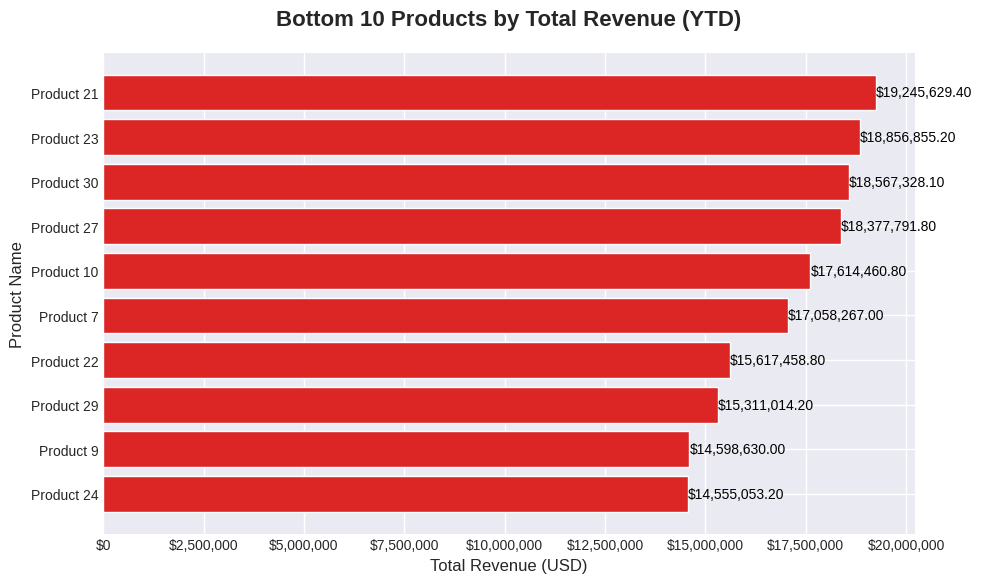

In [162]:
# --- 1. Create Sample DataFrame (Replace this section with your actual data loading) ---
def create_sample_dataframe(num_rows=1000, num_products=50):
    """Creates a sample DataFrame matching the user's schema for demonstration."""
    product_names = [f'Product_{i}' for i in range(1, num_products + 1)]

    # Generate random data
    data = {
        'order_number': np.arange(1, num_rows + 1),
        'order_date': pd.to_datetime(pd.date_range(start='2024-01-01', periods=num_rows, freq='H').to_numpy().reshape(-1)),
        'channel': np.random.choice(['Online', 'Retail', 'Wholesale'], num_rows),
        'product_name': np.random.choice(product_names, num_rows),
        'order_quantity': np.random.randint(1, 10, num_rows),
        'unit_price': np.round(np.random.uniform(5, 50, num_rows), 2),
    }

    df_new = pd.DataFrame(data)

    # Calculate revenue (making sure to simulate low performance for some products)
    df_new['revenue'] = df_new['order_quantity'] * df_new['unit_price']

    # Introduce some genuinely low-performing products to guarantee we get 10 low performers
    low_performers = ['Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5', 'Product_6', 'Product_7', 'Product_8', 'Product_9', 'Product_10']
    for prod in low_performers:
        mask = df_new['product_name'] == prod
        # Artificially lower the revenue for these specific products
        df_new.loc[mask, 'revenue'] = df_new.loc[mask, 'revenue'] * np.random.uniform(0.1, 0.5)

    return df

# Load the sample data (Replace this line with `df = pd.read_csv('your_data.csv')` or similar)
df_new = create_sample_dataframe()
print("Sample DataFrame created successfully.")
print(f"Total Unique Products: {df_new['product_name'].nunique()}")


# --- 2. Group and Aggregate Revenue ---
# Calculate the total revenue for each product
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()
product_revenue = product_revenue.sort_values(by='revenue', ascending=False)


# --- 3. Find Bottom Ten Products ---
# Sort by revenue ascending (worst performers first) and select the top 10
bottom_ten = product_revenue.nsmallest(10, 'revenue')

print("\n--- Bottom Ten Products by Revenue ---")
print(bottom_ten)


# --- 4. Visualize the Bottom Ten ---
if not bottom_ten.empty:
    # Ensure the lowest revenue product is at the bottom of the chart for better reading
    bottom_ten_sorted = bottom_ten.sort_values(by='revenue', ascending=True)

    plt.style.use('seaborn-v0_8-darkgrid')
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create the horizontal bar chart
    bars = ax.barh(
        bottom_ten_sorted['product_name'],
        bottom_ten_sorted['revenue'],
        color='#dc2626' # Red color for poor performance
    )

    # Add labels and title
    ax.set_title('Bottom 10 Products by Total Revenue (YTD)', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Total Revenue (USD)', fontsize=12)
    ax.set_ylabel('Product Name', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

    # Format x-axis ticks to be currency-like (e.g., $1,000)
    formatter = plt.FuncFormatter(lambda x, p: f'${x:,.0f}')
    ax.xaxis.set_major_formatter(formatter)

    # Add value labels to the bars
    for bar in bars:
        width = bar.get_width()
        label = f'${width:,.2f}'
        ax.text(
            width,
            bar.get_y() + bar.get_height() / 2,
            label,
            ha='left',  # horizontal alignment
            va='center', # vertical alignment
            fontsize=10,
            color='black'
        )

    plt.tight_layout()
    plt.show()

--- Top 3 Sales Channels by Revenue ---
       channel      revenue
2    Wholesale  667832737.6
0  Distributor  386909476.1
1       Export  180571733.5


/tmp/ipython-input-2698762917.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'order_date': pd.to_datetime(pd.date_range(start='2024-01-01', periods=num_rows, freq='H').to_numpy().reshape(-1)),


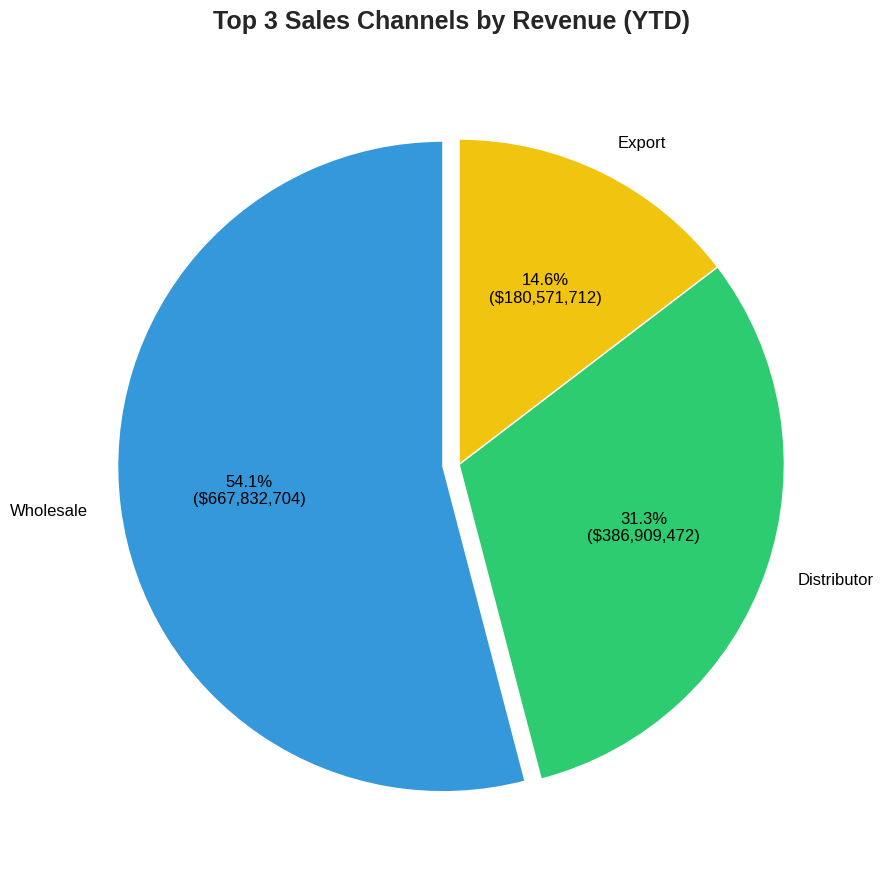

In [163]:
# Sales by channel



# Load the sample data (Replace this line with your actual data loading)
df_new = create_sample_dataframe()


# --- 2. Group and Aggregate Revenue by Channel ---
channel_revenue = df_new.groupby('channel')['revenue'].sum().reset_index()
channel_revenue = channel_revenue.sort_values(by='revenue', ascending=False)


# --- 3. Identify Top Three Channels ---
top_three_channels = channel_revenue.head(3)

print("--- Top 3 Sales Channels by Revenue ---")
print(top_three_channels)


# --- 4. Visualize the Top Three in a Pie Chart ---

if not top_three_channels.empty:
    labels = top_three_channels['channel']
    sizes = top_three_channels['revenue']

    # Custom labels to include percentage and total revenue (simulating tooltip data)
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = pct*total/100.0
            # Format: Channel Name (Percentage, $Total)
            return f'{pct:.1f}%\n(${val:,.0f})'
        return my_autopct

    # Define colors for different slices
    colors = ['#3498db', '#2ecc71', '#f1c40f'] # Blue, Green, Yellow

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(9, 9))

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        autopct=make_autopct(sizes),
        startangle=90,
        colors=colors,
        explode=[0.05, 0, 0], # Explode the largest slice for emphasis
        textprops={'fontsize': 12, 'color': 'black'}
    )

    # Set title and equal aspect ratio
    ax.set_title('Top 3 Sales Channels by Revenue (YTD)', fontsize=18, fontweight='bold', pad=20)
    ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-2698762917.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'order_date': pd.to_datetime(pd.date_range(start='2024-01-01', periods=num_rows, freq='H').to_numpy().reshape(-1)),


Overall Average Order Value (AOV): $115,622.80
Total Unique Orders: 10684


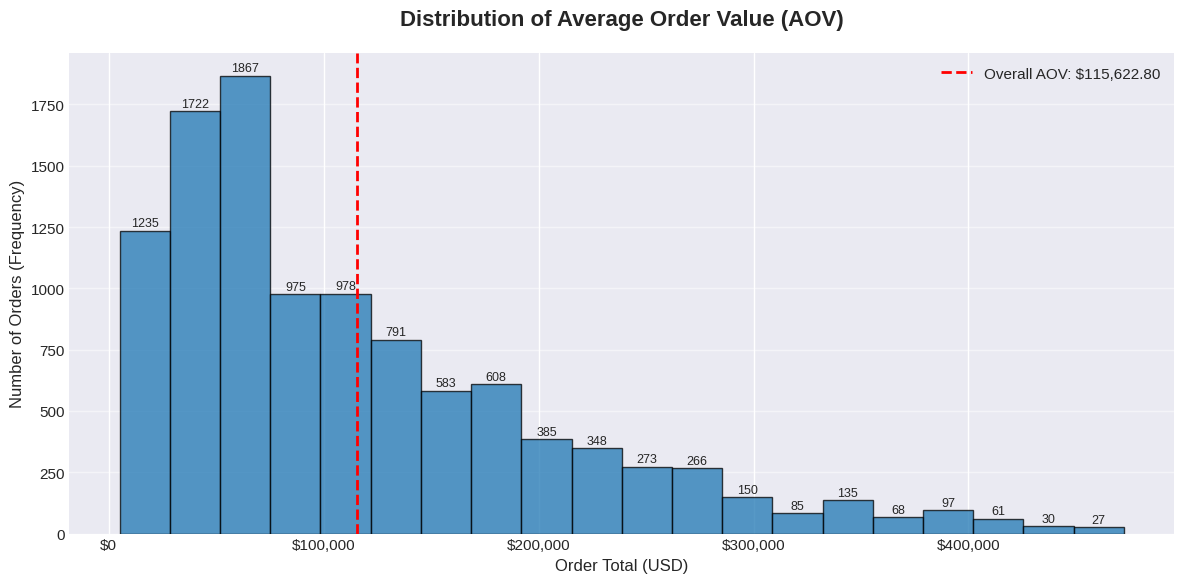

In [164]:
# Load the sample data (Replace this line with your actual data loading)
df_new = create_sample_dataframe(num_rows=2000) # Increased rows for a better distribution


# --- 2. Calculate Order Totals (AOV Distribution) ---
# AOV Distribution is the total revenue for each unique order number.
order_totals = df_new.groupby('order_number')['revenue'].sum().reset_index()
order_totals.rename(columns={'revenue': 'order_total'}, inplace=True)

# Calculate the overall Average Order Value (AOV) for annotation
overall_aov = order_totals['order_total'].mean()

print(f"Overall Average Order Value (AOV): ${overall_aov:,.2f}")
print(f"Total Unique Orders: {order_totals.shape[0]}")


# --- 3. Visualize the Distribution (Histogram) ---

plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))

# Define number of bins for the histogram
n_bins = 20

# Generate the histogram data
counts, bin_edges, patches = ax.hist(
    order_totals['order_total'],
    bins=n_bins,
    edgecolor='black',
    alpha=0.75,
    color='#1f77b4' # Uniform color for distribution
)

# --- 4. Apply Tooltips (Data Labels) and Formatting ---
# Add data labels (tooltips) above each bar
for count, rect in zip(counts, patches):
    height = rect.get_height()
    if height > 0:
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            height + 5,  # Place label slightly above the bar
            f'{int(count)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Add a vertical line for the Overall AOV
ax.axvline(
    overall_aov,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Overall AOV: ${overall_aov:,.2f}'
)

# Set labels and title
ax.set_title(
    'Distribution of Average Order Value (AOV)',
    fontsize=16,
    fontweight='bold',
    pad=20
)
ax.set_xlabel('Order Total (USD)', fontsize=12)
ax.set_ylabel('Number of Orders (Frequency)', fontsize=12)

# Format x-axis ticks to be currency-like
formatter = plt.FuncFormatter(lambda x, p: f'${x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.legend()
ax.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3743621314.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_name', y='unit_price', data=df, palette='Set2')


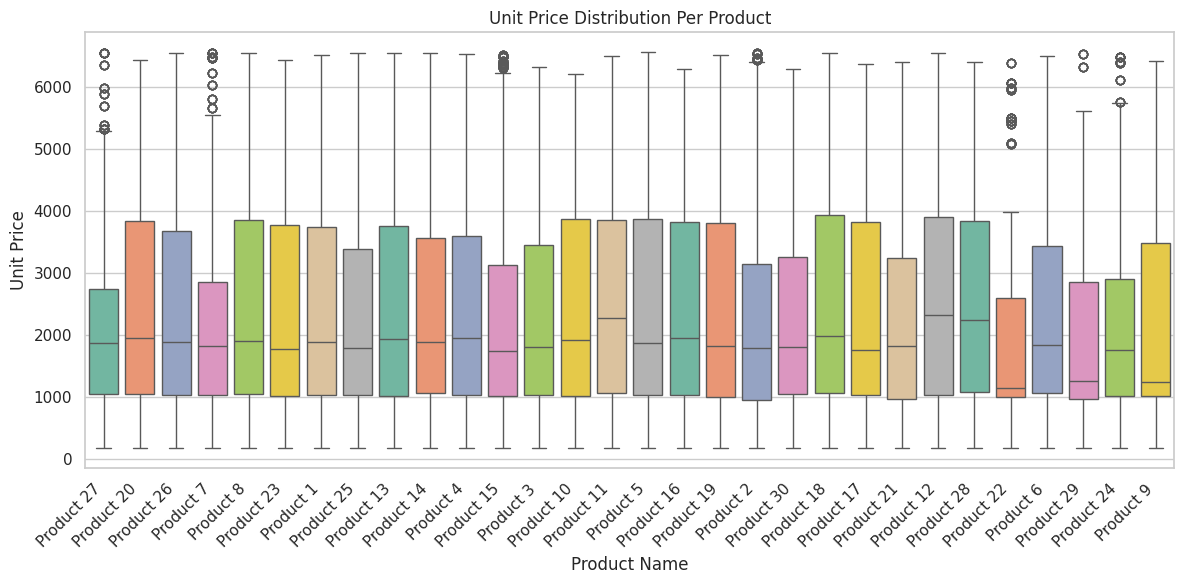

In [166]:
# Assuming your dataframe is named 'df'
# If not, replace 'df' with your dataframe variable name

# Set seaborn style for colorful plots
sns.set(style="whitegrid")

# Create a boxplot for unit price distribution per product
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_name', y='unit_price', data=df, palette='Set2')
plt.title('Unit Price Distribution Per Product')
plt.xlabel('Product Name')
plt.ylabel('Unit Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

/tmp/ipython-input-1160170616.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='state_name', data=top_revenue, palette='viridis')


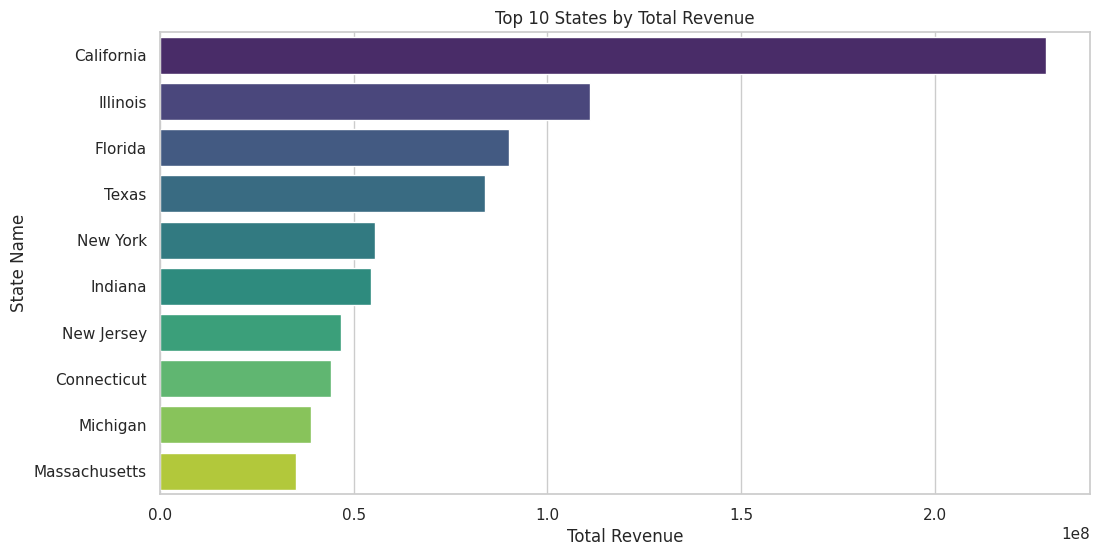

/tmp/ipython-input-1160170616.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_count', y='state_name', data=top_orders, palette='plasma')


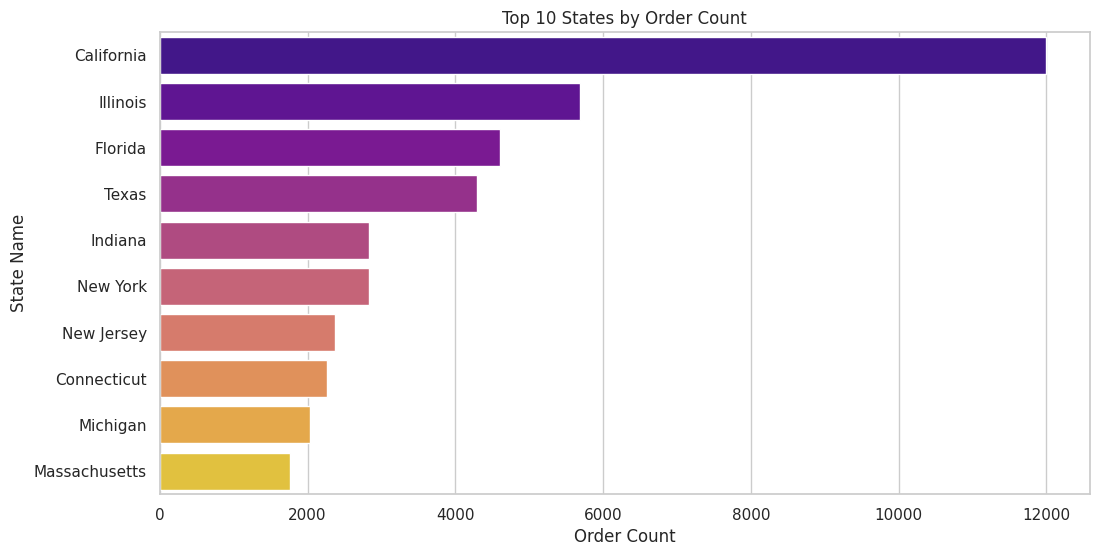

In [165]:
# Assuming your dataframe is named 'df'
# If not, replace 'df' with your dataframe variable name

# Group by state_name to calculate total revenue and order count
state_revenue = df_new.groupby('state_name')['revenue'].sum().reset_index()
state_orders = df_new.groupby('state_name').size().reset_index(name='order_count')

# Sort and get top 10 for revenue
top_revenue = state_revenue.sort_values(by='revenue', ascending=False).head(10)

# Sort and get top 10 for order count
top_orders = state_orders.sort_values(by='order_count', ascending=False).head(10)

# Set seaborn style for colorful plots
sns.set(style="whitegrid")

# Plot top 10 states by revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='state_name', data=top_revenue, palette='viridis')
plt.title('Top 10 States by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('State Name')
plt.show()

# Plot top 10 states by order count
plt.figure(figsize=(12, 6))
sns.barplot(x='order_count', y='state_name', data=top_orders, palette='plasma')
plt.title('Top 10 States by Order Count')
plt.xlabel('Order Count')
plt.ylabel('State Name')
plt.show()

/tmp/ipython-input-3131665480.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='profit_margin_pct', y='channel', data=avg_profit_margin, palette='magma')


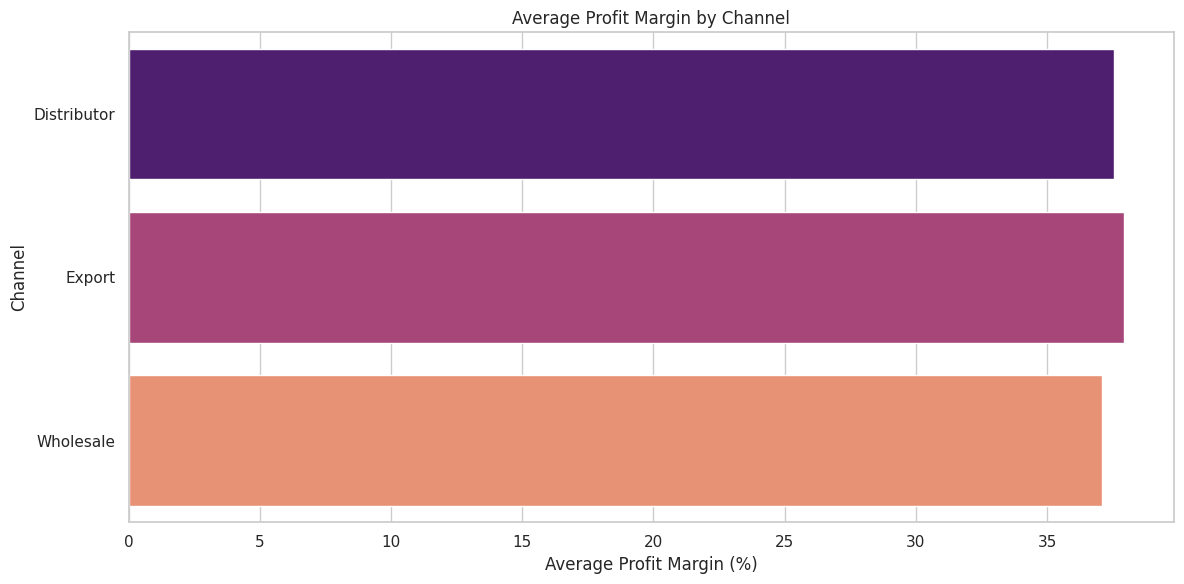

In [167]:
# Assuming your dataframe is named 'df'
# If not, replace 'df' with your dataframe variable name

# Group by channel to calculate average profit margin
avg_profit_margin = df_new.groupby('channel')['profit_margin_pct'].mean().reset_index()

# Set seaborn style for colorful plots
sns.set(style="whitegrid")

# Create a barplot for average profit margin by channel
plt.figure(figsize=(12, 6))
sns.barplot(x='profit_margin_pct', y='channel', data=avg_profit_margin, palette='magma')
plt.title('Average Profit Margin by Channel')
plt.xlabel('Average Profit Margin (%)')
plt.ylabel('Channel')
plt.tight_layout()
plt.show()